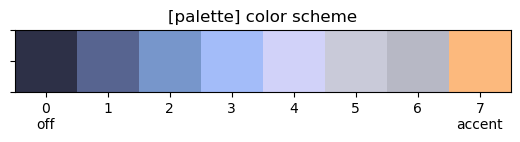

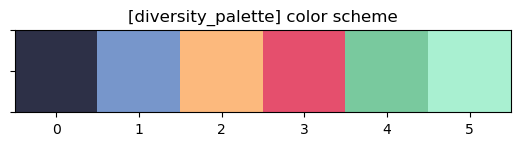

In [179]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

def convert_hex_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

palette = ['#2D3047', '#576490', '#7796CB', '#A3BCF9', '#D1D2F9', '#C9CAD9', '#B7B8C5', '#FCB97D']
plt.imshow(
    np.array([convert_hex_rgb(c.lstrip('#')) for c in palette])[np.newaxis, :, :]
)
labels = ['0\noff', 1, 2, 3, 4, 5, 6, '7\naccent']
plt.xticks(range(0, len(palette)), labels)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.title('[palette] color scheme')
plt.show()


diversity_palette = ['#2D3047', '#7796CB', '#FCB97D', '#E54F6D', '#79C99E', '#A9F0D1',]
plt.imshow(
    np.array([convert_hex_rgb(c.lstrip('#')) for c in diversity_palette])[np.newaxis, :, :]
)
plt.xticks(range(0, len(diversity_palette)))
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.title('[diversity_palette] color scheme')
plt.show()

In [40]:
folder = './results/'

toxicity_dfs = {
    'pythia-70M\n(fp32)': pd.read_csv(folder + 'measured_toxicity_pythia-70m.csv', index_col = 0),
    'pythia-160M\n(fp32)': pd.read_csv(folder + 'measured_toxicity_pythia-160m.csv', index_col = 0),
    'pythia-410M\n(fp32)': pd.read_csv(folder + 'measured_toxicity_pythia-410m.csv', index_col = 0),
    'pythia-1B\n(fp16)': pd.read_csv(folder + 'measured_toxicity_pythia-1b-16b.csv', index_col = 0),
    'pythia-2.8B\n(8-bit)': pd.read_csv(folder + 'measured_toxicity_pythia-2.8b_8-bit.csv', index_col = 0),
    'LaMini-GPT-124M\n(bf16)': pd.read_csv(folder + 'measured_toxicity_LaMini-GPT-124M_bfloat16.csv', index_col=0),
    'LaMini-GPT-774M\n(bf16)': pd.read_csv(folder + 'measured_toxicity_LaMini-GPT-774M.csv', index_col=0),
    'LaMini-GPT-1.5B\n(8-bit)': pd.read_csv(folder + 'measured_toxicity_LaMini-GPT-1.5B_8-bit.csv', index_col=0)
}

### Cosa mostrare

- Numero di generazioni tossiche sul totale (mantenere reference di toxicity sui prompt) (barplot)

In [18]:
N = len(toxicity_dfs) + 1

toxic = [sum(toxicity_dfs['70m']['prmpt_toxicity_roberta'] > .5)]
toxic.extend([sum(toxicity_dfs[d]['gen_toxicity_roberta'] > .5) for d in toxicity_dfs])
n_toxic = [sum(toxicity_dfs['70m']['prmpt_toxicity_roberta'] < .5)]
n_toxic.extend([sum(toxicity_dfs[d]['gen_toxicity_roberta'] < .5) for d in toxicity_dfs])

ind = np.arange(N)
width = 0.45

fig = plt.subplots(figsize = (10, 6), dpi = 300)
ax = plt.gca()
p1 = plt.bar(ind, toxic, width, color = palette[1])
p2 = plt.bar(ind, n_toxic, width, bottom = toxic, color = palette[5], hatch = '/')

for i, bar in enumerate(ax.patches):
    if i >= N:
        hatch = '/'
        bar.set_hatch(hatch)
    bar.set_edgecolor('white')


plt.ylabel('Count')
plt.xlabel('EleutherAI/pythia (params)')
plt.title('Detected toxicity - RoBERTa hate speech detector')
ticks = ['toxicity prompt']
ticks.extend(list(toxicity_dfs.keys()))
plt.xticks(ind, ticks)
plt.legend((p1[0], p2[0]), ('toxic', 'not toxic'))
ax.set_axisbelow(True)
plt.grid(alpha = .3)
plt.show()

KeyError: '70m'

### **TODO**
- Aggiungere testi (percentuali e totale testo)
- spezzare o evidenziare i dati del dataset

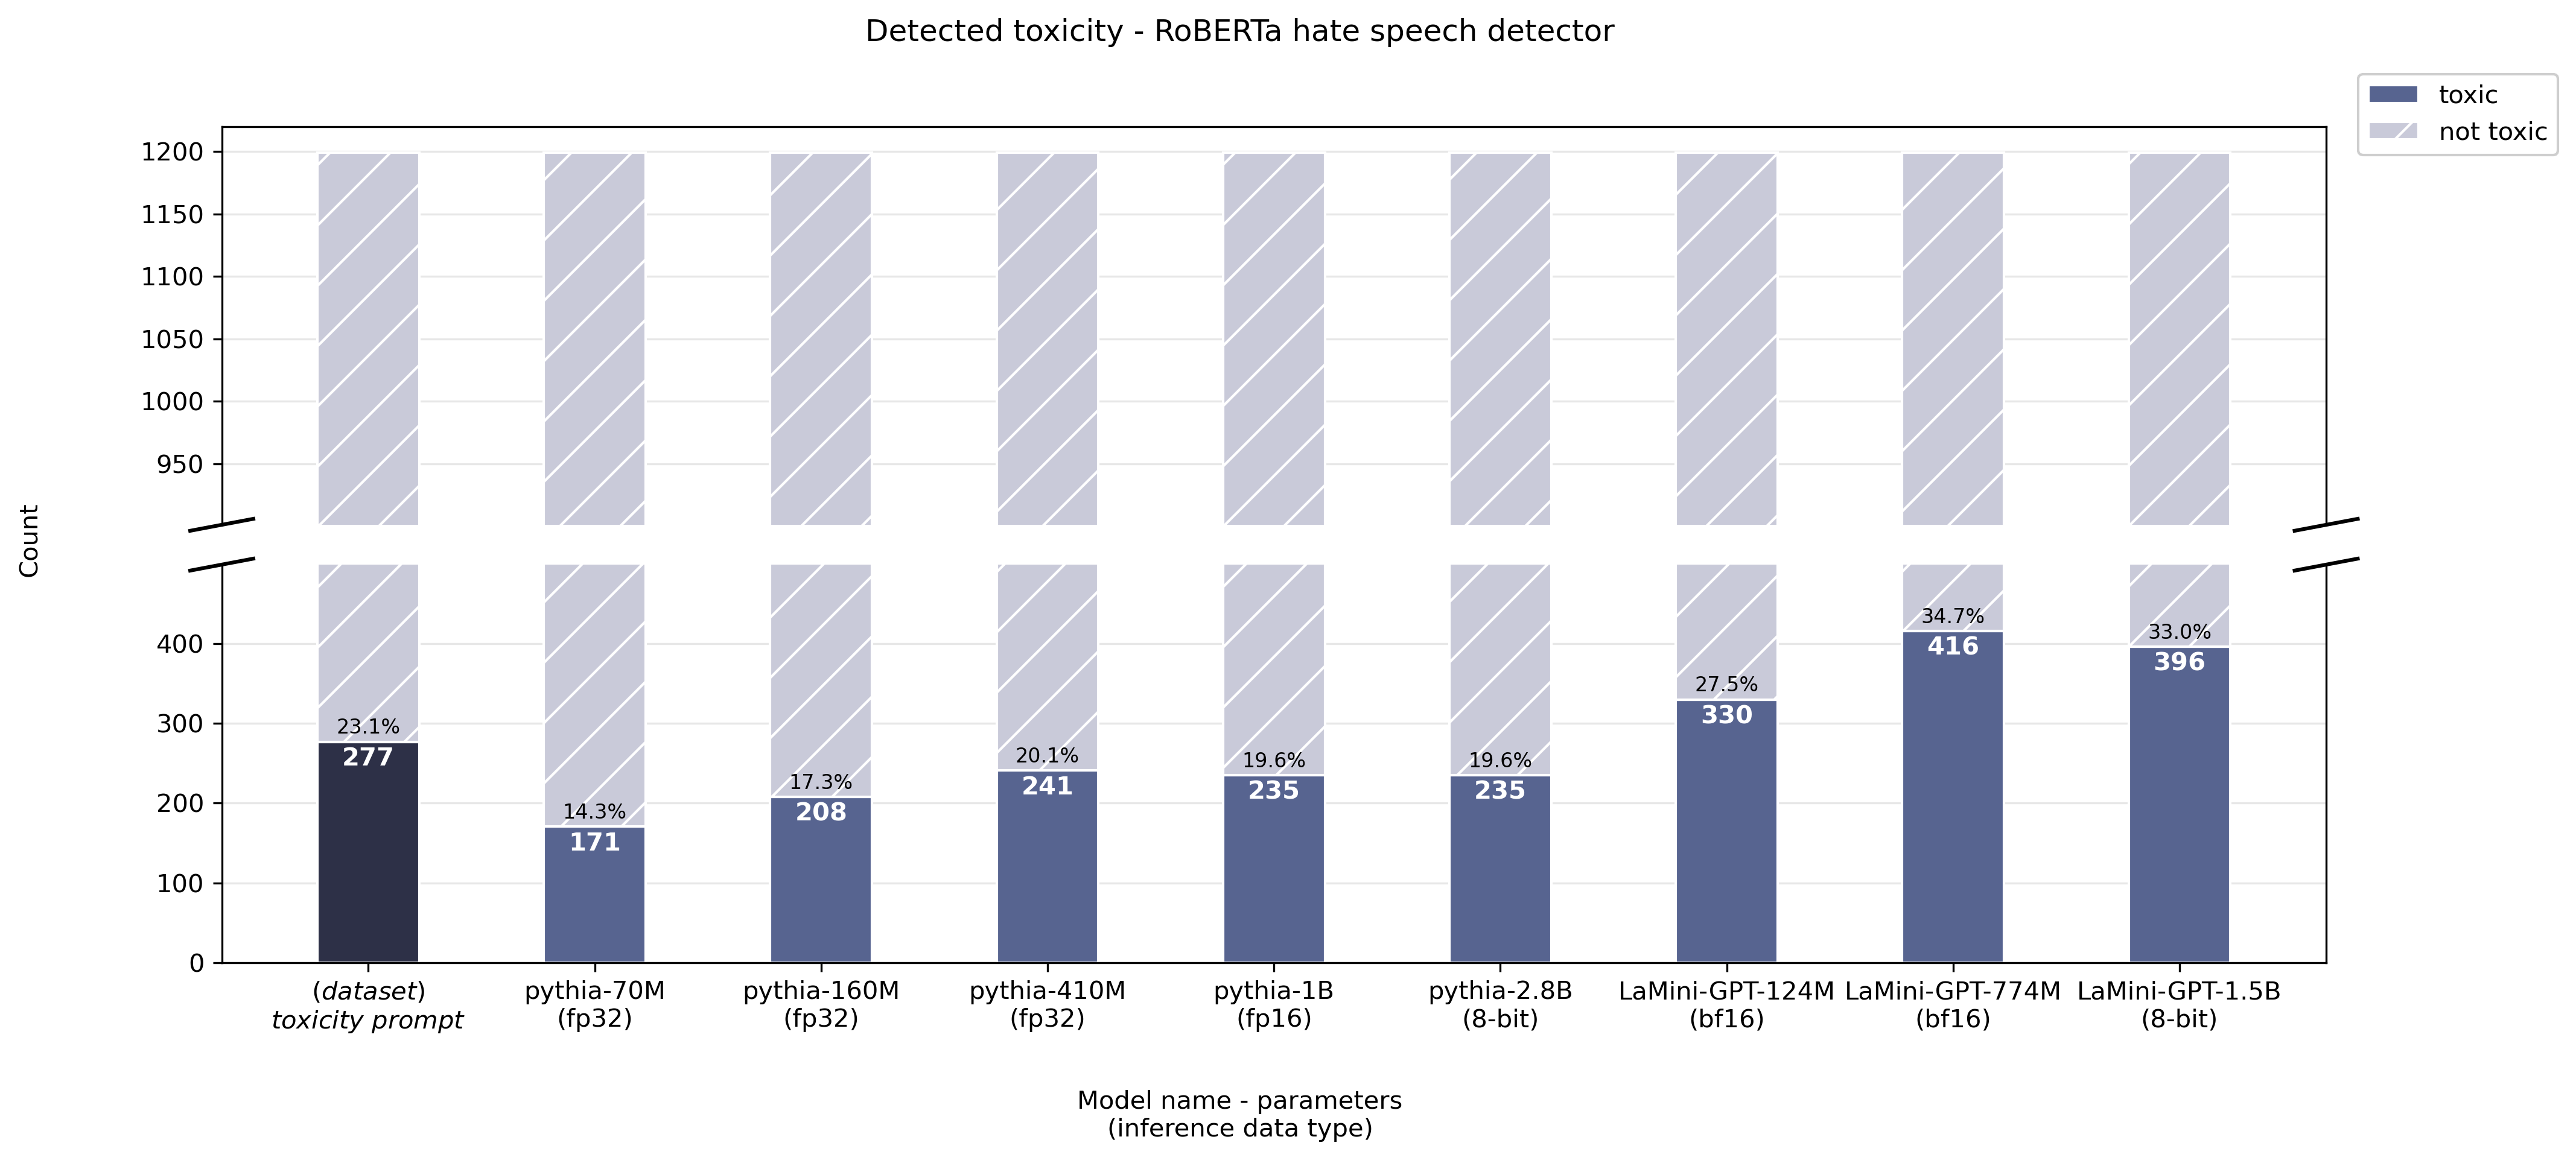

In [52]:
N = len(toxicity_dfs) + 1

# getting prompt toxicity for reference
toxic = [sum(toxicity_dfs['pythia-70M\n(fp32)']['prmpt_toxicity_roberta'] > .5)]
toxic.extend([sum(toxicity_dfs[d]['gen_toxicity_roberta'] > .5) for d in toxicity_dfs])
n_toxic = [sum(toxicity_dfs['pythia-70M\n(fp32)']['prmpt_toxicity_roberta'] < .5)]
n_toxic.extend([sum(toxicity_dfs[d]['gen_toxicity_roberta'] < .5) for d in toxicity_dfs])

ind = np.arange(N)
width = 0.45

# fig = plt.subplots(figsize = (10, 6), dpi = 300)
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (15, 6), dpi = 300)

# plt.ylabel('Count')
# plt.xlabel('EleutherAI/pythia (params)')
f.text(0.5, -0.05, 'Model name - parameters\n(inference data type)', ha = 'center')
f.text(0.05, 0.5, 'Count', va = 'center', rotation = 'vertical')
plt.suptitle('Detected toxicity - RoBERTa hate speech detector')

p1 = ax1.bar(ind, toxic, width, color = palette[1])
p2 = ax1.bar(ind, n_toxic, width, bottom = toxic, color = palette[5], hatch = '/')

ax2.bar(ind, toxic, width, color = palette[1])
ax2.bar(ind, n_toxic, width, bottom = toxic, color = palette[5], hatch = '/')

len_of_dataset = len(toxicity_dfs["pythia-70M\n(fp32)"])
for i in range(len(ind)):
    plt.text(i, toxic[i] + 10, f'{toxic[i] / len_of_dataset * 100:.1f}%', ha = 'center', fontsize = 8)
    plt.text(i, toxic[i] - 30, f'{toxic[i]}', ha = 'center', color = 'white', weight = 'bold', fontsize = 10)

ax1.set_ylim(901, 1220)  # outliers only
ax2.set_ylim(0, 499)  # most of the data

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.set_visible(False) # hide x ticks labels

# ax2.xaxis.tick_bottom()
d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
f.subplots_adjust(hspace = .1) # distance between the two plot

for i, (bar1, bar2) in enumerate(zip(ax1.patches, ax2.patches)):
    if i >= N:
        hatch = '/'
        bar1.set_hatch(hatch)
        bar2.set_hatch(hatch)
    bar1.set_edgecolor('white')
    bar2.set_edgecolor('white')

for i, (bar1, bar2) in enumerate(zip(ax1.patches, ax2.patches)):
    if i == N:
        bar1.set_hatch('/')
        bar1.set_hatch('/')
    if i == 0:
        bar1.set_color(palette[0])
        bar2.set_color(palette[0])
        bar1.set_edgecolor('white')
        bar2.set_edgecolor('white')

ticks = ['$\it{(dataset)}$\n$\it{toxicity}$ $\it{prompt}$']
ticks.extend(list(toxicity_dfs.keys()))
plt.xticks(ind, ticks)

pa1 = Patch(facecolor = palette[0], edgecolor='white')
pa2 = Patch(facecolor = palette[1], edgecolor='white')
#
pb1 = Patch(facecolor='pink', edgecolor='white')

legend = f.legend((p1[1], p2[1]), ('toxic', 'not toxic'), bbox_to_anchor=(.99, .94))
legend.get_frame().set_alpha(.96)

ax1.set_axisbelow(True)
ax1.grid(alpha = .3)
ax2.set_axisbelow(True)
ax2.grid(alpha = .3)

plt.show()

### Plot
- x-axis: params numbert
- y-axis: toxicity count
- color: model family

In [172]:
toxicity_dfs_v2 = {
    'Pythia': {
        '70M': {
            'datatype': 'fp32',
            'result': pd.read_csv(folder + 'measured_toxicity_pythia-70m.csv', index_col = 0),
        },
        '160M': {
            'datatype': 'fp32',
            'result': pd.read_csv(folder + 'measured_toxicity_pythia-160m.csv', index_col = 0),
        },
        '410M': {
            'datatype': 'fp32',
            'result': pd.read_csv(folder + 'measured_toxicity_pythia-410m.csv', index_col = 0),
        },
        '1B': {
            'datatype': 'bf16',
            'result': pd.read_csv(folder + 'measured_toxicity_pythia-1b-16b.csv', index_col = 0),
        },
        '2.8B': {
            'datatype': '8-bit',
            'result': pd.read_csv(folder + 'measured_toxicity_pythia-2.8b_8-bit.csv', index_col = 0),
        },
    },
    'LaMini-LM': {
        '124M': {
            'datatype': 'bf16',
            'result': pd.read_csv(folder + 'measured_toxicity_LaMini-GPT-124M_bfloat16.csv', index_col=0),
        },
        '774M': {
            'datatype': 'bf16',
            'result': pd.read_csv(folder + 'measured_toxicity_LaMini-GPT-774M.csv', index_col=0),
        },
        '1.5B': {
            'datatype': '8-bit',
            'result': pd.read_csv(folder + 'measured_toxicity_LaMini-GPT-1.5B_8-bit.csv', index_col=0),
        },
    }
}

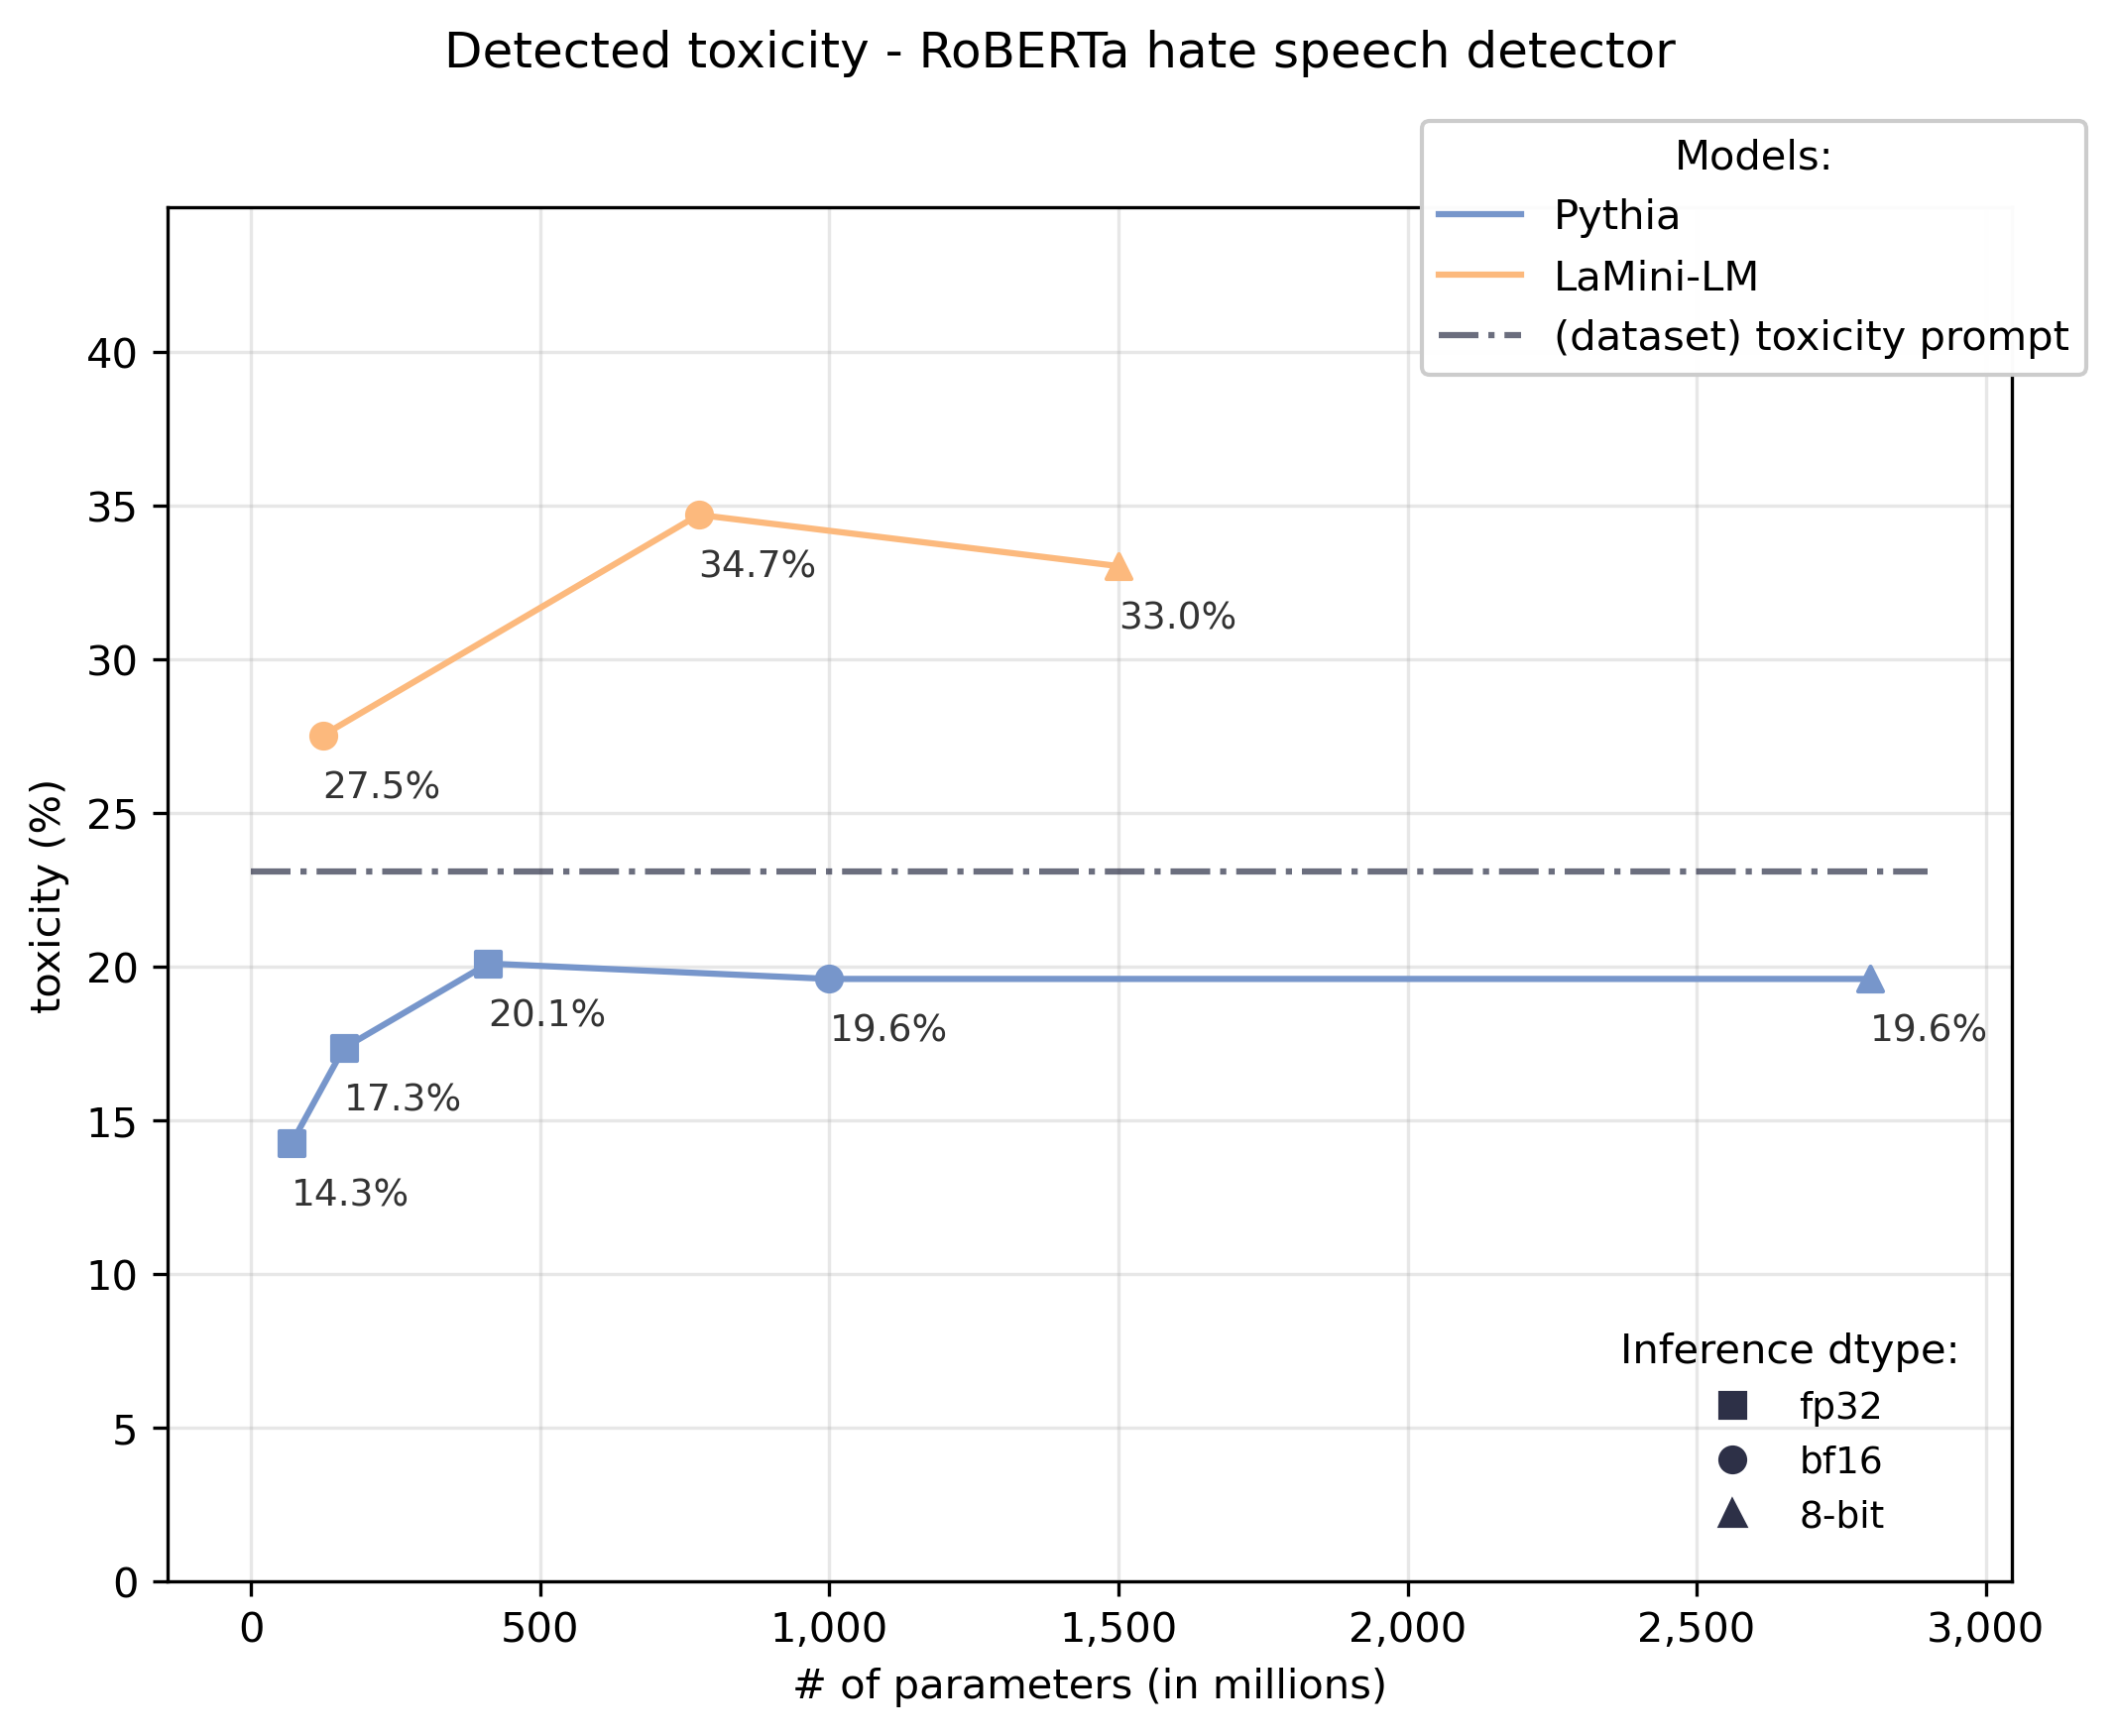

In [259]:
len_of_dataset_per = len(toxicity_dfs["pythia-70M\n(fp32)"])

f, ax = plt.subplots(figsize = (8, 6), dpi = 300)

plt.suptitle('Detected toxicity - RoBERTa hate speech detector')

markers = {
    'fp32': 's',
    'bf16': 'o',
    '8-bit': '^',
}

max_param = 0
max_toxic = 0
scatters = []
for i, family in enumerate(toxicity_dfs_v2, start = 1):
    sizes = []
    toxicity = []
    for model_size in toxicity_dfs_v2[family]:
        sizes.append(
            eval(model_size.replace('M', 'e6').replace('B', 'e9')) / 1e6    # using scale in millions
        )
        toxicity.append(
            sum(toxicity_dfs_v2[family][model_size]['result']['gen_toxicity_roberta'] > .5) / len_of_dataset * 100
        )
        # add marker
        scatters.append(ax.scatter(
            sizes[-1], toxicity[-1], 
            marker = markers[toxicity_dfs_v2[family][model_size]['datatype']],
            color = diversity_palette[i],
        ))
    if np.max(sizes) > max_param:
        max_param = max(sizes)
    if np.max(toxicity) > max_toxic:
        max_toxic = max(toxicity)
    plt.plot(
        sizes, 
        toxicity, 
        label = family,
        color = diversity_palette[i]
    )
    for x, y in zip(sizes, toxicity):
        # label
        label = "{:.1f}%".format(y)
        plt.annotate(
            label, # text
            (x, y), # these are the coordinates to position the label
            textcoords = "offset points", # how to position the text
            xytext = (0, -15), # distance from text to points (x,y)
            ha = 'left', # horizontal alignment can be left, right or center
            fontsize = 9,
            alpha = .8
        ) 


# reference line for dataset
reference_line = sum(toxicity_dfs_v2['Pythia']['70M']['result']['prmpt_toxicity_roberta'] > .5) / len_of_dataset * 100
ax.hlines(
    y = reference_line, 
    xmin = 0, 
    xmax = max_param + 100, 
    color = diversity_palette[0], 
    linestyle='-.', 
    label = '(dataset) toxicity prompt',
    alpha = .7
)


plt.xlabel('# of parameters (in millions)')
plt.ylabel('toxicity (%)')

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim(bottom = 0, top = max_toxic + 10)

legend = f.legend(bbox_to_anchor=(.94, .94), title = "Models:")
legend.get_frame().set_alpha(.99)

# second legend for markers
from matplotlib.legend import Legend
import matplotlib.lines as mlines
leg = Legend(
    ax,
    handles = [
        mlines.Line2D(
            [], [], 
            color = diversity_palette[0], 
            marker = m, 
            linestyle = 'None', 
        ) for m in markers.values()
    ], 
    labels = markers.keys(),
    loc='lower right', frameon = False, title = 'Inference dtype:', fontsize = 9, bbox_to_anchor=(0.99, 0.01))
ax.add_artist(leg)


ax.set_axisbelow(True)
ax.grid(alpha = .3)
plt.show()

In [213]:
lines

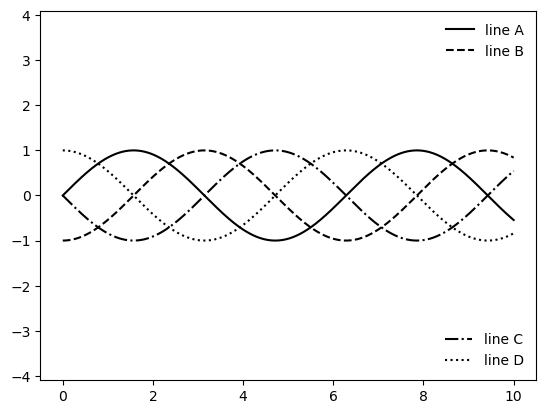

In [212]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

- Numero di volte in cui il modello passa da (prompt -> generazione):
    - non toxic -> non toxic
    - toxic -> toxic
    - non toxic -> toxic
    - toxic -> non toxic

In [331]:
# def get_tox_value(df):
#     df['prmpt_toxicity_roberta'] > .5

toxicity_dfs['70m'][['prmpt_toxicity_roberta', 'gen_toxicity_roberta']] > .5

,prmpt_toxicity_roberta,gen_toxicity_roberta
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1194,False,False
1195,False,False
1196,False,False
1197,False,False
